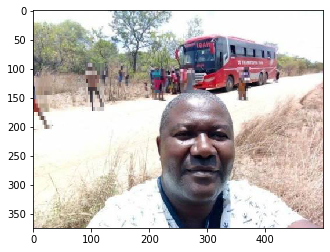

In [86]:
import numpy as np
import cv2
import numpy as np
import glob
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle

def load_npz():
    load_results=np.load('result.npz')
    masks=load_results['masks']
    rois=load_results['rois']
    classIds=load_results['classId']
    return masks, rois, classIds
 
def pos_inMask(X,Y,masks):
    cnt=0
    for mask in masks[Y,X]:
        if (mask==True) :
            return cnt
        cnt +=1
        
    assert cnt==len(masks[0][0]), "다시 터치하세요" # 에러메세지 전달해야됨

def load_images(foreground_path):
    try:
        foreground= glob.glob(foreground_path+'/*.jpg')[0]
    except:
        foreground= glob.glob(foreground_path+'/*.png')[0]

    foreground = load_img(foreground)
    foreground = img_to_array(foreground)

    return foreground

def mosaicImage(foreground,rois,classIds,index):
    cnt=0
    for ( y1, x1, y2, x2) in rois:
        if (cnt!=index) and (classIds[cnt]==1): #터치한 부분 이외 사람
            # 얼굴 부분 자르기 image[y1:y2, x1:x2]
            face = foreground[y1:y2, x1:x2]
            # 자른 이미지를 지정한 배율로 확대/축소하기
            face = cv2.resize(face, (12,12))
            # 확대/축소한 그림을 원래 크기로 돌리기
            face = cv2.resize(face, ((x2-x1),(y2-y1)), interpolation=cv2.INTER_AREA)
            # 원래 이미지에 붙이기
            foreground[y1:y2, x1:x2] = face
        cnt +=1
    pyplot.imshow(foreground.astype(np.uint8))
    Image.fromarray(foreground.astype(np.uint8)).save('output/display_result_of_mosaic.png')

def main():
    img_path = 'img/foreground'
    masks, rois, classIds = load_npz()
    X = 200
    Y = 300
    index = pos_inMask(X,Y,masks)
    img = load_images(img_path)
    mosaicImage(img,rois,classIds,index)
    
if __name__== "__main__":
    main()
   